<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Sarina Heshmati


In [1]:
student_number = 401110437
full_name = 'Parsa Ghezelbash'
assert student_number and full_name is not None, 'please input your information'

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
sns.set(style="whitegrid")

## Overview

In this assignment, you will explore a dataset containing information about employees and use that data to train models capable of predicting whether those employees have left the company (attrited) or not. You will start by exploring the dataset, analyzing its features, and performing necessary preprocessing steps (such as label encoding and scaling). Then, you will build and evaluate implementations of K-Nearest Neighbors (KNN) as well as Random Forest, Bagging, and AdaBoost classifiers. After training and tuning each model, you’ll compare their performance using metrics like accuracy and feature importance to identify the best approach for accurate attrition prediction.

# Load and Explore Dataset (10 points)

In [3]:
import pandas as pd

# Load the dataset
# "Attrition" is our target columm

df = pd.read_csv('dataset.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
2,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
3,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8
4,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,1606,...,3,80,1,32,3,3,30,8,12,13


Explore the dataset and get familiar with its features and statistics. (don't worry about the 'masked values' in our target column. They are simply used to automatically test your model later on.)

In [4]:
# TODO: Check the basic structure of the dataset using .info() and .describe()
# Use: df.info() to check data types and missing values
# Use: df.describe() to get summary statistics of numeric features
print(df.info())
print(df.describe())
print('########################################')

# TODO: Check for any missing values in the dataset
# Use: df.isnull().sum() to find if any column has missing values
print('Null value checking:')
print(df.isnull().sum())
print('########################################')

# TODO: Explore the target variable (binary classification)
# Use value_counts() to see the distribution of our target (Attrition) column and then visualize it (bar plot).
print(df['Attrition'].value_counts())
print('########################################')


df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 902 entries, 0 to 901
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       902 non-null    int64 
 1   Attrition                 902 non-null    object
 2   BusinessTravel            902 non-null    object
 3   DailyRate                 902 non-null    int64 
 4   Department                902 non-null    object
 5   DistanceFromHome          902 non-null    int64 
 6   Education                 902 non-null    int64 
 7   EducationField            902 non-null    object
 8   EmployeeCount             902 non-null    int64 
 9   EmployeeNumber            902 non-null    int64 
 10  EnvironmentSatisfaction   902 non-null    int64 
 11  Gender                    902 non-null    object
 12  HourlyRate                902 non-null    int64 
 13  JobInvolvement            902 non-null    int64 
 14  JobLevel                  

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
2,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
3,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8
4,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1,1606,...,3,80,1,32,3,3,30,8,12,13


It is generally better to remove columns with only one unique value from a DataFrame when preparing data for a decision tree. <br>
Such columns do not provide any useful information for splitting the data and can lead to unnecessary complexity in the model. Remove the said columns from the DataFrame.

In [5]:
# TODO Measure and print the number of unique values for each column. 
# Check if there are any columns with less than 2 unique values. If so, remove them. 

unique_values = {}
one_values = {}

columns = df.columns
for column in columns:
    unique_values[column] = df[column].unique().shape[0]
    if (unique_values[column] < 2):
        one_values[column] = unique_values[column]

print('All columns unique values:')
print(unique_values)
print('############################')

print('Columns with less than 2 unique values:')
print(one_values)

df = df.drop(columns=one_values.keys())
df

All columns unique values:
{'Age': 42, 'Attrition': 2, 'BusinessTravel': 3, 'DailyRate': 653, 'Department': 3, 'DistanceFromHome': 29, 'Education': 5, 'EducationField': 6, 'EmployeeCount': 1, 'EmployeeNumber': 902, 'EnvironmentSatisfaction': 4, 'Gender': 2, 'HourlyRate': 71, 'JobInvolvement': 4, 'JobLevel': 5, 'JobRole': 9, 'JobSatisfaction': 4, 'MaritalStatus': 3, 'MonthlyIncome': 853, 'MonthlyRate': 888, 'NumCompaniesWorked': 10, 'Over18': 1, 'OverTime': 2, 'PercentSalaryHike': 15, 'PerformanceRating': 2, 'RelationshipSatisfaction': 4, 'StandardHours': 1, 'StockOptionLevel': 4, 'TotalWorkingYears': 40, 'TrainingTimesLastYear': 7, 'WorkLifeBalance': 4, 'YearsAtCompany': 34, 'YearsInCurrentRole': 19, 'YearsSinceLastPromotion': 16, 'YearsWithCurrManager': 17}
############################
Columns with less than 2 unique values:
{'EmployeeCount': 1, 'Over18': 1, 'StandardHours': 1}


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1883,4,...,3,2,0,11,2,3,3,2,1,2
1,34,No,Travel_Rarely,1326,Sales,3,3,Other,1478,4,...,3,4,0,15,2,3,13,9,3,12
2,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1965,4,...,3,1,0,7,5,3,7,7,0,7
3,32,No,Travel_Rarely,929,Sales,10,3,Marketing,722,4,...,3,4,0,10,2,2,10,7,0,8
4,50,No,Travel_Frequently,1234,Research & Development,20,5,Medical,1606,2,...,3,3,1,32,3,3,30,8,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,35,No,Travel_Rarely,750,Research & Development,28,3,Life Sciences,1596,2,...,3,4,2,10,3,2,10,9,6,8
898,41,No,Travel_Rarely,447,Research & Development,5,3,Life Sciences,1814,2,...,3,1,0,11,3,1,3,2,1,2
899,22,Yes,Travel_Frequently,1256,Research & Development,3,4,Life Sciences,1203,3,...,3,2,1,1,5,3,0,0,0,0
900,29,No,Travel_Rarely,1378,Research & Development,13,2,Other,2053,4,...,3,1,1,10,2,3,4,3,0,3


Look at the DataFrame and try to gather insight into people's monthly income and things that generally affect this number.

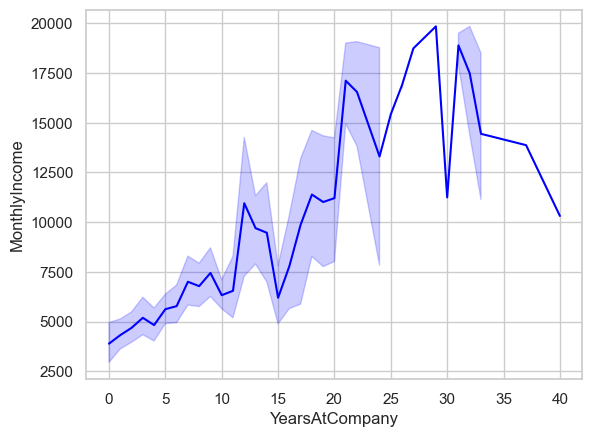

department with maximum income: Sales
department with minimum income: Research & Development


In [6]:
# TODO: Plot (lineplot) the average MonthlyIncome against the YearsAtCompany. 
sns.lineplot(data=df, x='YearsAtCompany', y='MonthlyIncome', color='blue')
# TODO: Then find which departments have the highest and lowest incomes on average.
plt.show()

department_income_df = df[['Department', 'MonthlyIncome']].groupby('Department').agg({'MonthlyIncome': 'mean'})
print(f'department with maximum income: {department_income_df.idxmax().values[0]}')
print(f'department with minimum income: {department_income_df.idxmin().values[0]}')

# Data Preprocessing (5 points)

Label Encode categorical columns and create a new DataFrame. Then split this data into train and test.

In [7]:
# TODO: Label encode all categorical columns
le = LabelEncoder()
categorical_df = df.drop(labels=list(df._get_numeric_data().columns), axis=1)
df[categorical_df.columns] = df[categorical_df.columns].apply(le.fit_transform)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,0,2,592,1,7,3,1,1883,4,...,3,2,0,11,2,3,3,2,1,2
1,34,0,2,1326,2,3,3,4,1478,4,...,3,4,0,15,2,3,13,9,3,12
2,27,0,2,954,2,9,3,2,1965,4,...,3,1,0,7,5,3,7,7,0,7
3,32,0,2,929,2,10,3,2,722,4,...,3,4,0,10,2,2,10,7,0,8
4,50,0,1,1234,1,20,5,3,1606,2,...,3,3,1,32,3,3,30,8,12,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,35,0,2,750,1,28,3,1,1596,2,...,3,4,2,10,3,2,10,9,6,8
898,41,0,2,447,1,5,3,1,1814,2,...,3,1,0,11,3,1,3,2,1,2
899,22,1,1,1256,1,3,4,1,1203,3,...,3,2,1,1,5,3,0,0,0,0
900,29,0,2,1378,1,13,2,4,2053,4,...,3,1,1,10,2,3,4,3,0,3


In [8]:
# Split into features and target variable
X = df.drop(columns=['Attrition'])
y = df['Attrition']

categorical_df

# TODO: Perform a train-test split using train_test_split() from sklearn
# Split the dataset into training and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

# TODO: Scale the features using StandardScaler
# Fit the scaler on the training data and transform both the training and test sets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape

((631, 31), (271, 31))

# K-Nearest Neighbors (KNN) Model (15 points)

Implement KNN model from scratch.

In [9]:
import numpy as np
from collections import Counter

class CustomKNN:
    def __init__(self, k):
        """
        Initialize the KNN classifier.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        # Store the number of neighbors (k)
        self.k = k

    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data.

        Parameters:
        - X_train (numpy array): Training feature vectors.
        - y_train (numpy array): Training labels.
        """
        # Store training data
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def euclidean_distance(self, x1, x2):
        """
        Calculate the Euclidean distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Euclidean distance between x1 and x2.
        """
        # TODO: Calculate and return the Euclidean distance
        return np.linalg.norm(x1 - x2)

    def predict(self, X_test):
        """
        Predict labels for test data.

        Parameters:
        - X_test (numpy array): Test feature vectors.

        Returns:
        - numpy array: Predicted labels.
        """
        # TODO: Predict label for each test instance and return the array of predictions
        y_pred = np.array([self._predict(x_t) for x_t in X_test])
        return y_pred

    def _predict(self, x):
        """
        Predict label for a single data point.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        # TODO: Compute distances from x to all training points.
        # Find the indices and labels of k nearest neighbors.
        # Perform mafority vote and return the most common label among them.
        dists = np.array([self.euclidean_distance(x, x_train) for x_train in self.X_train])
        k_nearest_neighbors = np.argsort(dists)[:min(self.X_train.shape[0], self.k)]
        k_nearest_labels = self.y_train[k_nearest_neighbors]
        unique, counts = np.unique(k_nearest_labels, return_counts=True)
        return unique[np.argmax(counts)]



Fit and test your model using different k values and then choose the best one.

In [10]:
# Optional. You can choose any range of k values that you want.
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
accuracies = []
models = []


for k in k_values:
    y_pred_custom= []
    
    # TODO: Fit the model using the scaled training data
    knn = CustomKNN(k=k)
    models.append(knn)
    knn.fit(X_train, y_train)
    
    # TODO: Make predictions on the scaled test data
    y_pred_custom = knn.predict(X_test)
    # TODO: Evaluate the model's accuracy for each value of k and choose the best one
    accuracies.append(accuracy_score(y_test, y_pred_custom))
    print(f'k: {k} - Accuracy: {accuracy_score(y_test, y_pred_custom)}')
    

Best_custom_model= models[np.argmax(accuracies)]

# Keep the best k value (needed later on with bagging)
bestk= k_values[np.argmax(accuracies)]
print(f'best k: {bestk}')

k: 1 - Accuracy: 0.7712177121771218
k: 3 - Accuracy: 0.7933579335793358
k: 5 - Accuracy: 0.7785977859778598
k: 7 - Accuracy: 0.8081180811808119
k: 9 - Accuracy: 0.8118081180811808
k: 11 - Accuracy: 0.8007380073800738
k: 13 - Accuracy: 0.8007380073800738
k: 15 - Accuracy: 0.7933579335793358
best k: 9


In [11]:
# TODO: Print the accuracy and classification report using sklearn's metrics for your best model
y_pred_best_custom = Best_custom_model.predict(X_test)
print(classification_report(y_test, y_pred_best_custom, zero_division=0))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_best_custom))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       215
           1       0.69      0.16      0.26        56

    accuracy                           0.81       271
   macro avg       0.76      0.57      0.58       271
weighted avg       0.79      0.81      0.76       271

Confusion Matrix:
[[211   4]
 [ 47   9]]


Visualize the confusion matrix for KNN predictions

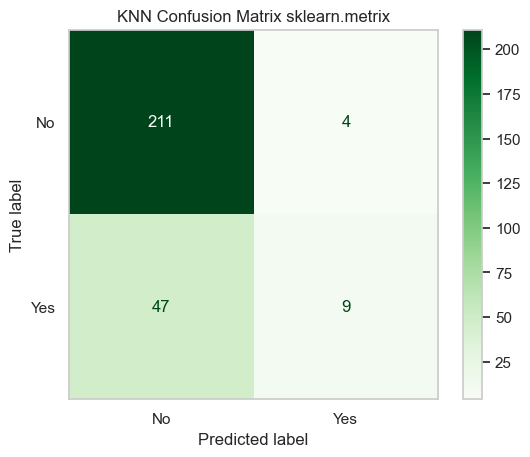

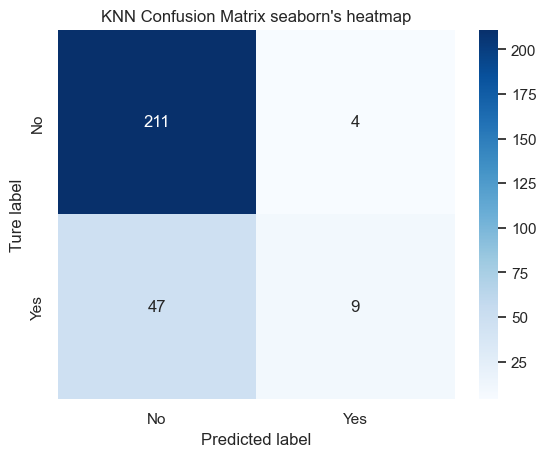

In [12]:
# TODO: Create a confusion matrix for KNN predictions
# Use confusion_matrix from sklearn.metrics
cm = confusion_matrix(y_test, y_pred_best_custom)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Greens)
plt.grid(False)
plt.title('KNN Confusion Matrix sklearn.metrix')
plt.show()

# TODO: Visualize the confusion matrix using seaborn's heatmap
# Add annotations and a title for better readability
sns.heatmap(data=cm, cmap=plt.cm.Blues, annot=True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], fmt='d')
plt.title('KNN Confusion Matrix seaborn\'s heatmap')
plt.xlabel('Predicted label')
plt.ylabel('Ture label')
plt.show()


## Evaluation (30 points)
In this part, we are going to evaluate your model's performance on another set of unseen data. Load test.csv (this data is already encoded), use your best_custom_model to predict and save the results in a DataFrame called 'result.csv'. The DataFrame should contain one column called 'target' that contains your model's predictions.

In [13]:
# Load test.csv
eval_df= pd.read_csv('test.csv')

# TODO: Use your old scaler to scale the data
eval_df = scaler.transform(eval_df)
# TODO: Predict using your model
y_pred_eval = Best_custom_model.predict(eval_df)
y_pred_eval

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1])

Save the results in a DataFrame

In [14]:
# Save the results as a csv file
result_df= pd.DataFrame()
result_df['target']=pd.Series(y_pred_eval)
result_df.to_csv('result.csv', index= False)

# Random Forest Model (12 points)

Implement a random forest model using sklearn.

In [15]:
# TODO: Implement the Random Forest model
rf = RandomForestClassifier(random_state=42)

# TODO: Set up a hyperparameter tuning process for Random Forest using GridSearchCV
# Suggested parameter grid: {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5 , 10]
}

# GridSearchCV with Random Forest
rf_cv = GridSearchCV(rf, param_grid_rf, cv=5)

# TODO: Fit the GridSearchCV on the training data to find the best parameters
# Use rf_cv.fit() with the training data
rf_cv.fit(X_train, y_train)

# TODO: Use the best Random Forest model for predictions on the test data
# Use rf_cv.best_estimator_ and predict()
y_pred_rf = rf_cv.best_estimator_.predict(X_test)

# TODO: Print the Random Forest model accuracy and classification report using sklearn's metrics
# Use accuracy_score and classification_report
print(f'Random Forest accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(classification_report(y_test, y_pred_rf))

Random Forest accuracy: 0.8154981549815498
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       215
           1       0.67      0.21      0.32        56

    accuracy                           0.82       271
   macro avg       0.75      0.59      0.61       271
weighted avg       0.79      0.82      0.78       271



Visualize the confusion matrix for Random Forest predictions

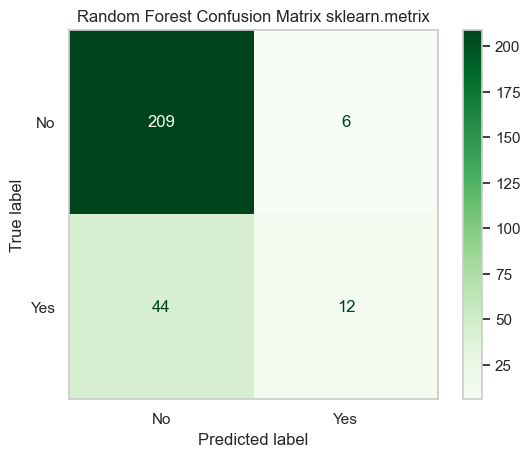

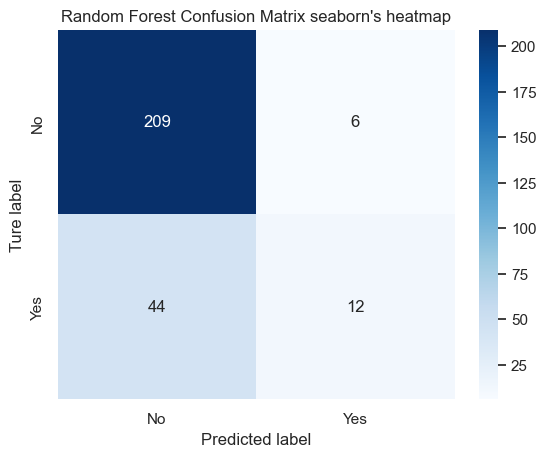

In [16]:
# TODO: Create a confusion matrix for Random Forest predictions
# Use confusion_matrix from sklearn.metrics
cm = confusion_matrix(y_test, y_pred_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Greens)
plt.grid(False)
plt.title('Random Forest Confusion Matrix sklearn.metrix')
plt.show()

# TODO: Visualize the confusion matrix using seaborn's heatmap
# Add annotations and a title for better readability
sns.heatmap(data=cm, cmap=plt.cm.Blues, annot=True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], fmt='d')
plt.title('Random Forest Confusion Matrix seaborn\'s heatmap')
plt.xlabel('Predicted label')
plt.ylabel('Ture label')
plt.show()

A feature importance plot is a visual representation that illustrates the significance of each feature (or variable) in a machine learning model, particularly in the context of supervised learning tasks like classification and regression. Plot the feature importances using a bar plot.

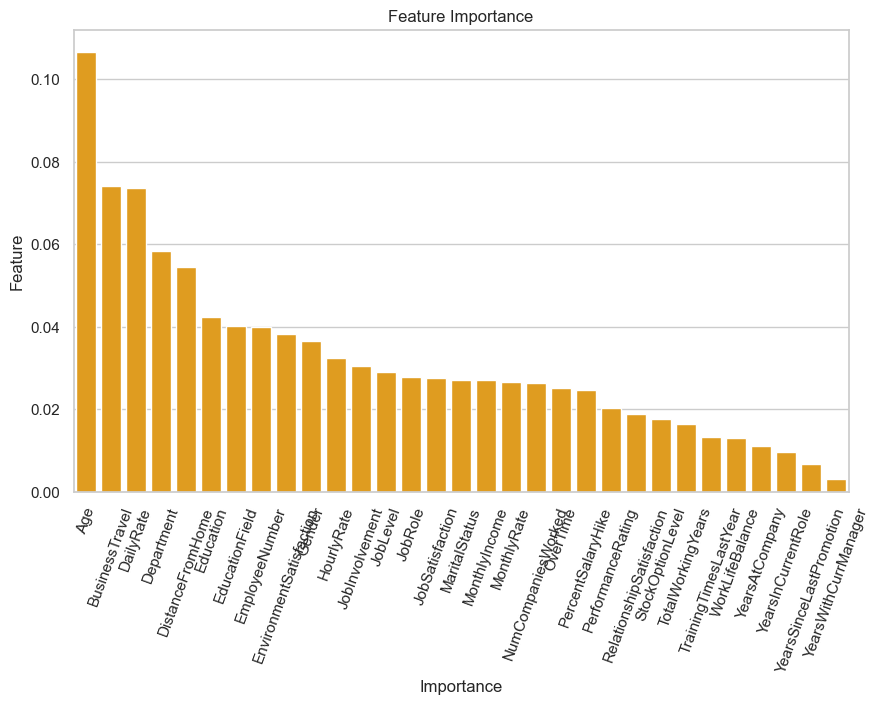

In [17]:
# Get the feature importances from the trained Random Forest model
best_rf = rf_cv.best_estimator_
importances= best_rf.feature_importances_

# TODO: Sort the indices of the importance values in descending order
sorted_indices = np.argsort(importances)[::-1]
# TODO: Create a DataFrame that contains the feature names and their corresponding importance scores
importances_df = pd.DataFrame({'feature': X.columns, 'importance': importances[sorted_indices]})
# TODO: Create a bar plot to visualize feature importances using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='feature', y='importance', data=importances_df, color='orange')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

# use tick_params and Rotate the x-axis labels for better readability
plt.tick_params(axis='x', labelrotation=70)
plt.show()

# Bagging with KNN (12 points)

In [18]:
# TODO: Implement Bagging with KNN
# Use BaggingClassifier with KNeighborsClassifier as the base estimator
# Here we use the bestk value we found before

bagging_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=bestk), n_estimators=50, random_state=42)

# TODO: Fit the BaggingClassifier on the scaled training data
# Use bagging_knn.fit() with the training data
bagging_knn.fit(X_train, y_train)

# TODO: Use the trained Bagging model for predictions on the test data
# Use bagging_knn.predict()
y_pred_bagging = bagging_knn.predict(X_test)

# TODO: Print the Bagging KNN model accuracy and classification report
# Use accuracy_score and classification_report
print(f'Bagging with KNN accuracy: {accuracy_score(y_test, y_pred_bagging)}')
print(classification_report(y_test, y_pred_bagging, zero_division=False))

Bagging with KNN accuracy: 0.8044280442804428
              precision    recall  f1-score   support

           0       0.81      0.98      0.89       215
           1       0.62      0.14      0.23        56

    accuracy                           0.80       271
   macro avg       0.71      0.56      0.56       271
weighted avg       0.77      0.80      0.75       271



Visualize the confusion matrix for Baggin KNN predictions

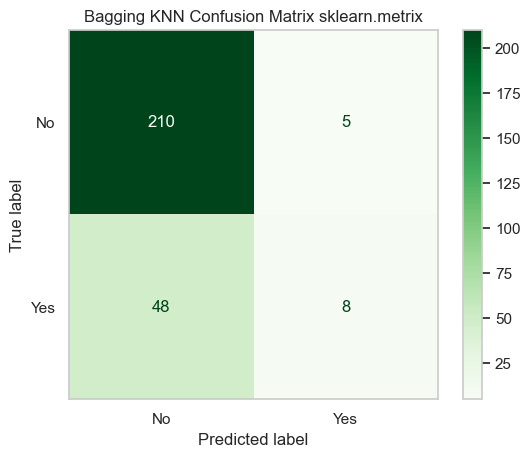

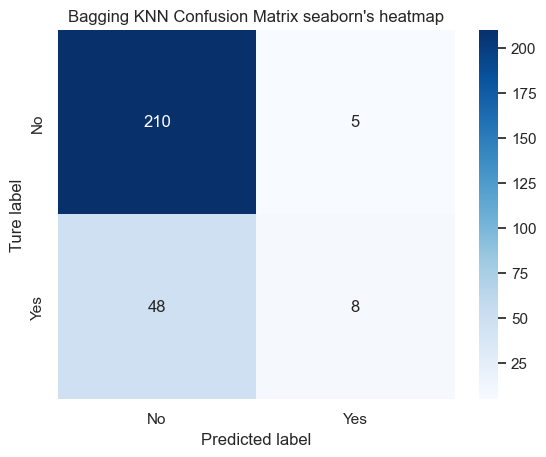

In [19]:
# TODO: Create a confusion matrix for Bagging KNN predictions
# Use confusion_matrix from sklearn.metrics
cm = confusion_matrix(y_test, y_pred_bagging)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Greens)
plt.grid(False)
plt.title('Bagging KNN Confusion Matrix sklearn.metrix')
plt.show()

# TODO: Visualize the confusion matrix using seaborn's heatmap
# Add annotations and a title for better readability
sns.heatmap(data=cm, cmap=plt.cm.Blues, annot=True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], fmt='d')
plt.title('Bagging KNN Confusion Matrix seaborn\'s heatmap')
plt.xlabel('Predicted label')
plt.ylabel('Ture label')
plt.show()

# AdaBoost Model (12 points)

In [20]:
# TODO: Implement AdaBoost model
adaboost = AdaBoostClassifier(random_state=42, algorithm='SAMME')

# TODO: Set up a hyperparameter tuning process for AdaBoost using GridSearchCV
# Suggested parameter grid: {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 1.0]}
param_grid_ada = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# GridSearchCV with AdaBoost
adaboost_cv = GridSearchCV(adaboost, param_grid_ada, cv=5)

# TODO: Fit the GridSearchCV on the training data to find the best parameters
# Use adaboost_cv.fit() with the training data
adaboost_cv.fit(X_train, y_train)

# TODO: Use the best AdaBoost model for predictions on the test data
# Use adaboost_cv.best_estimator_ and predict()
y_pred_adaboost = adaboost_cv.best_estimator_.predict(X_test)

# TODO: Print the AdaBoost model accuracy and classification report using sklearn's metrics
# Use accuracy_score and classification_report
print(f'AdaBoost accuracy: {accuracy_score(y_test, y_pred_adaboost)}')
print(classification_report(y_test, y_pred_adaboost))

AdaBoost accuracy: 0.8487084870848709
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       215
           1       0.73      0.43      0.54        56

    accuracy                           0.85       271
   macro avg       0.80      0.69      0.72       271
weighted avg       0.84      0.85      0.83       271



Visualize the confusion matrix for AdaBoost predictions

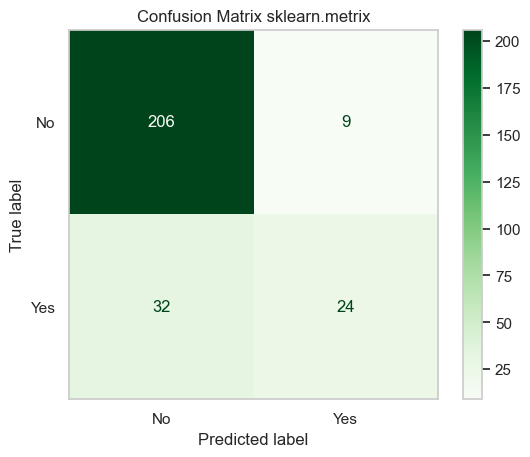

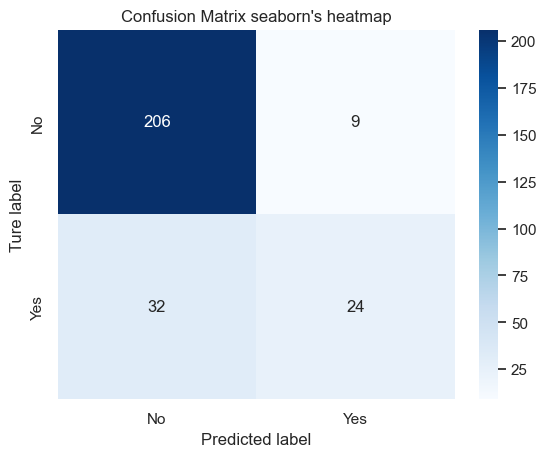

In [21]:
# TODO: Create a confusion matrix for AdaBoost predictions
# Use confusion_matrix from sklearn.metrics
cm = confusion_matrix(y_test, y_pred_adaboost)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap=plt.cm.Greens)
plt.grid(False)
plt.title('Confusion Matrix sklearn.metrix')
plt.show()

# TODO: Visualize the confusion matrix using seaborn's heatmap
# Add annotations and a title for better readability
sns.heatmap(data=cm, cmap=plt.cm.Blues, annot=True, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'], fmt='d')
plt.title('Confusion Matrix seaborn\'s heatmap')
plt.xlabel('Predicted label')
plt.ylabel('Ture label')
plt.show()

# Model Comparison (4 points)

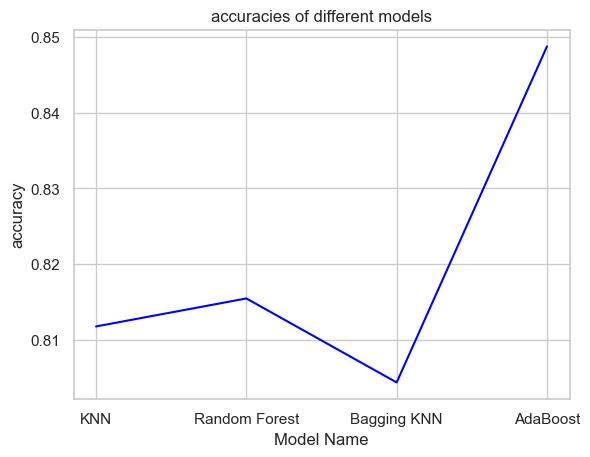

In [22]:
def compute_accuracy(model):
    return accuracy_score(y_test, model.predict(X_test))

# TODO: Compare model accuracies for KNN, Random Forest, Bagging KNN, and AdaBoost
# Create a DataFrame with model names and their respective accuracies
models = {
    'Model Name': ['KNN', 'Random Forest', 'Bagging KNN', 'AdaBoost'],
    'Model': [Best_custom_model, best_rf, bagging_knn, adaboost_cv.best_estimator_]
}
models_df = pd.DataFrame(models)
models_df['accuracy'] = models_df['Model'].apply(compute_accuracy)
models_df = models_df.drop(columns=['Model'])
# TODO: Visualize the model comparison using a line plot
# Use seaborn's lineplot to plot model names vs. accuracies
sns.lineplot(x='Model Name', y='accuracy', data=models_df, c='blue')
plt.title('accuracies of different models')
plt.show()